In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 10.6MB/s 


In [0]:
link = 'https://drive.google.com/open?id=16aNDt1SwQaSzhcF3RbUfEn3gTHIytspD' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

16aNDt1SwQaSzhcF3RbUfEn3gTHIytspD


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('quoradata.csv')  
df3 = pd.read_csv('quoradata.csv',nrows=100000)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [0]:
data=df3
data=data

In [0]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


this is the data we have which includes question1 and question2 we have to bulit a machine learning model based on this data to predict whether the question is duplicate or not

for this we also want to do  employ the feature extraction and feature engineering methods

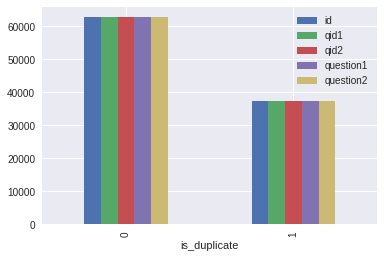

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
data.groupby("is_duplicate").count().plot.bar()

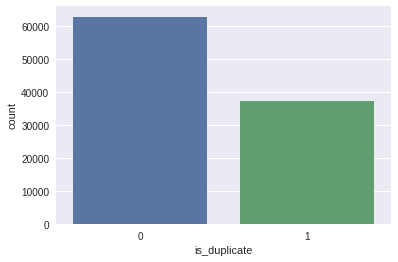

In [0]:
import seaborn as sns
sns.countplot(data['is_duplicate'])
plt.show()

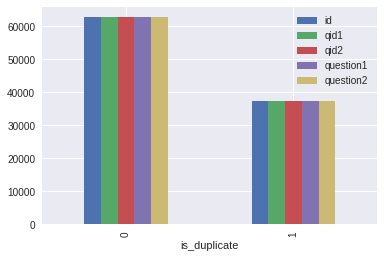

In [0]:
data.groupby("is_duplicate").count().plot.bar()

In [0]:
#actually we want to know how many repeated questions and number of non repeated questions
#for that i convert them into list later into one dimensional arrayusing pd.series
#then i can use value_counts function to know how many occured how many number of times
#our ambition is to find the number of unique questions
qids=pd.Series(data['qid1'].tolist()+data['qid2'].tolist())

In [0]:
qids[:10]#it is nothing but the one dimensional array which stores both lists

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
8    17
9    19
dtype: int64

In [0]:
#now we gonna find the unique questions
uniquequestions=len(np.unique(qids))

In [0]:
#no.of questions occuring more than one time
quesmoreonetime=np.sum(qids.value_counts()>1)

In [0]:
print(uniquequestions)

165931


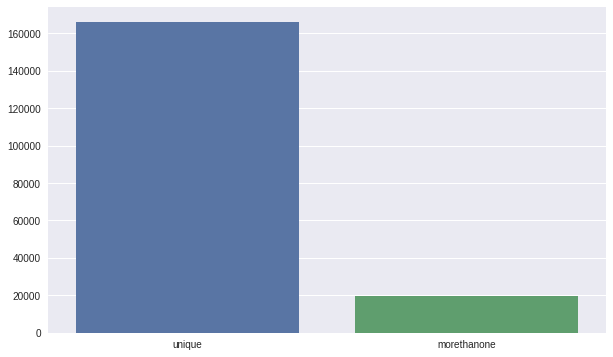

In [0]:
#if u want to draw the bar graph between the quantities
#it is very easy fix x label and y
#first always writen code plt.figure(figsize=(10,6))
#import sns.barplot
#if u want to plot bar graph of dataframe then
#dataframe['column']['acc.to this column'].count.plot.bar()
#whether in case of series 
#seriesname.value_counts().plot(kind='bar')
import seaborn as sns
x=["unique","morethanone"]
y=[uniquequestions,quesmoreonetime]
plt.figure(figsize=(10,6))
sns.barplot(x,y)
plt.show()

In [0]:
#whenever you are counting the dataframe then you should use count()
#now we see any pair of questions are duplicated
pairdup=data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

In [0]:
pairdup.shape[0]-data.shape[0]

0

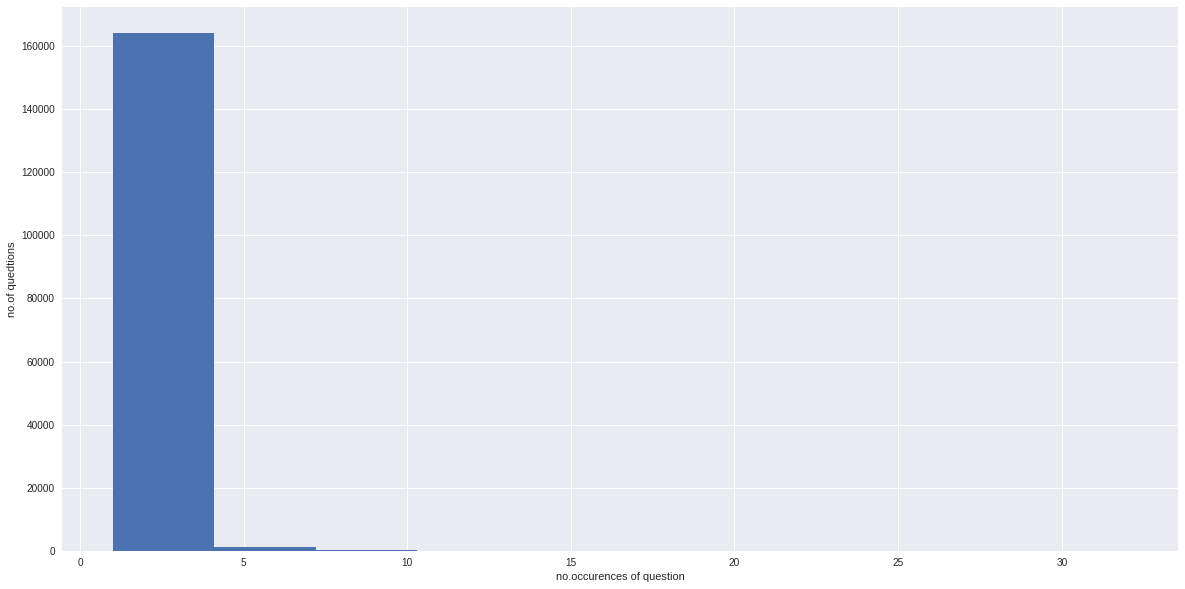

In [0]:
#i want to know how many times each question has occured
#here we are not plotting bar graph to compare few quantities 
#we plot histogram when we have many quantities
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts())
plt.xlabel("no.occurences of question")
plt.ylabel("no.of quedtions")
plt.show()

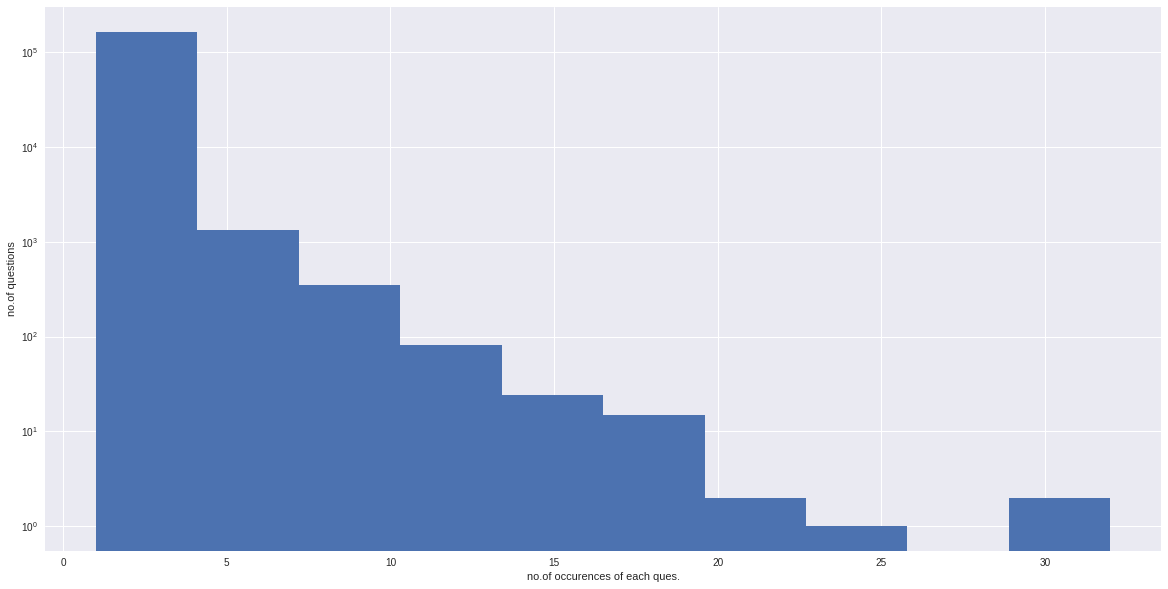

In [0]:
#we want to see the graph nicely
#since the values are very high 
#we use yscale as log
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts())
plt.xlabel("no.of occurences of each ques.")
plt.ylabel("no.of questions")
plt.yscale('log',nonposy='clip')

In [0]:
#dataframe.isnull().any(1) is the method to find any any null elements 
#in dataframe
#you can fill the null elements using .fillna(' ') method
nullrows=data[data.isnull().any(1)]
print(nullrows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [0]:
data=data.fillna(' ')


In [0]:
nulrows=data[data.isnull().any(1)]
print(nulrows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [0]:
#we can also use another format that is 
data['qid1freq']=data.groupby('qid1')['qid1'].transform('count')

In [0]:
data['qid2freq']=data.groupby('qid2')['qid2'].transform('count')

In [0]:
data['q1len']=data['question1'].str.len()
data['q2len']=data['question2'].str.len()
data['q1words']=data['question1'].map(lambda sent: len(sent.split(" ")))
data['q2words']=data['question2'].map(lambda sent:len(sent.split(" ")))


In [0]:
# strip() is the method which gives the output remopving the 
#leading and trailing characters of a string
#now i wish to take the number of common words between question1 &2
#as a feature
#here important point is iam not able top apply here
#because map is applied in series
#w1=data['question1'].apply(lambda sent: sent.split().lower().strip())
#here iam not able to use this lower() so i have to take map and pass 
#it as an argument inside it
def commonword(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return 1.0*len(w1&w2)
data['common']=data.apply(commonword,axis=1)

In [0]:
#we want to add one more feature, length of total words
def wordlength(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return 1.0*(len(w1)+len(w2))
data['wordlength']=data.apply(wordlength,axis=1)

In [0]:
#our next feature is word share
def wordshare(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return 1.0*((len(w1)&len(w2))/(len(w1)+len(w2)))
data['wordshare']=data.apply(wordshare,axis=1)

In [0]:
# i want to add two more features that are basic
data['q1f+q2f']=data['qid1freq']+data['qid2freq']
data['q1f-q2f']=data['qid1freq']+data['qid2freq']

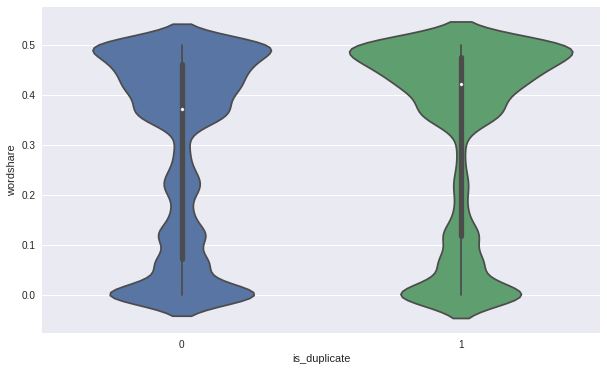

In [0]:
plt.figure(figsize=(10,6))
sns.violinplot(x='is_duplicate',y='wordshare',data=data[0:])

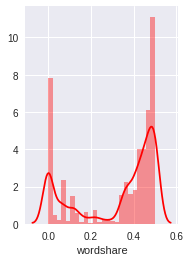

In [0]:
plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate']==1.0]['wordshare'][0:],label="1",color='red')

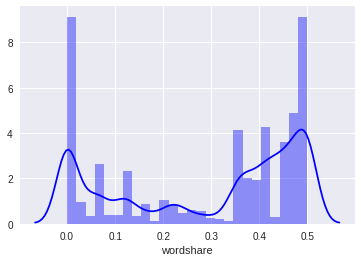

In [0]:
sns.distplot(data[data['is_duplicate']==0.0]['wordshare'][0:],label="0",color='blue')

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [0]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
stop=set(stopwords.words("english"))

In [0]:
#now we preprocess the data before extracting the features of advanced level using fuzzy features
# To get the results in 4 decemal points 
SAFE_DIV = 0.0001


import re

def preprocess(x):
    #str(x) is the function used to change the recieved thing into string
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter= PorterStemmer()
    pattern = re.compile('\W')
    # i just wanna replace the whereever \w is present into ' '
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
       
               
    
    return x

In [0]:
# now we do advanced feature extraction
#feature1: get number of commonwords not including stopwords/min(n1q1,n1q2)
#feature2: get number of common words not including stopwords/max(n1q1,n1q2)
#feature3: get number of stop wordscommon/min(n1q1,n1q2)
#feature4: get number of stopwordscommon/max(n1q1,n1q2)
#feature5: get number of common words including stopwords/min(n1q1,n1q2)
#feature6: get number of common words including stopwords/max(n1q1,n1q2)
#feature7: lastword of question1 and question2 same or not
#feature8: firstword of question1 and question2 same or not
#feature9: length of difference between number of words in q1 and q2
#feature10:length of common substring of q1 and q2/min(len of(q1,q2))
#feature11:fuzz-ratio give 1 when q1 and q2 are more similar else 0
#feature12: fuzz_partial_ratio it gives value based on common words
#feature13: token_sort_ratio it give the similarity value after sorting words
#feature14: token_set_tatio it will also give similarity values of 3 types
# i will take each of them first store into array add later to dataframe
wordcloud=[]
def advancedfeatures(q1,q2):
    tokenfeatures=[0.0]*10
    q1tokens=q1.split()
    q2tokens=q2.split()

    if (len(q1tokens)==0) or (len(q2tokens)==0):
        return tokenfeatures
    q1words=set([word for word in q1tokens if word not in stop])
    q2words=set([word for word in q2tokens if word not in stop])
    q1wordscloud=([word for word in q1tokens if word not in stop])
    q2wordscloud=([word for word in q2tokens if word not in stop])
    wordcloud=q1wordscloud+q2wordscloud
    q1stops=set([word for word in q1tokens if word in stop ])
    q2stops=set([word for word in q2tokens if word in stop])
    commonwordnostop=len(q1words.intersection(q2words))
    commonstop=len(q1stops.intersection(q2stops))
    commonword=len(set(q1tokens).intersection(set(q2tokens)))
    tokenfeatures[0]=commonwordnostop/(min(len(q1words),len(q2words))+SAFE_DIV)
    tokenfeatures[1]=commonstop/(min(len(q1stops),len(q2stops))+SAFE_DIV)
    tokenfeatures[2]=commonword/(min(len(q1tokens),len(q2tokens))+SAFE_DIV)
    tokenfeatures[3]=commonwordnostop/(max(len(q1words),len(q2words))+SAFE_DIV)
    tokenfeatures[4]=commonstop/(max(len(q1stops),len(q2stops))+SAFE_DIV)
    tokenfeatures[5]=commonword/(max(len(q1tokens),len(q2tokens))+SAFE_DIV)
    tokenfeatures[6]=int(q1tokens[-1]==q2tokens[-1])
    tokenfeatures[7]=int(q1tokens[0]==q2tokens[0])
    tokenfeatures[8]=abs(len(q1tokens)-len(q2tokens))
    tokenfeatures[9]=(len(q1tokens)+len(q2tokens))/2
    return tokenfeatures

def longestcommonsubstringratio(a,b):
    strs=list(distance.lcsubstrings(a,b))
    if len(strs)==0:
        return 0
    else:
        return len(strs[0])/(min(len(a),len(b))+1)
def extractfeatures(dataframe):
    dataframe['question1']=dataframe['question1'].fillna(" ").map(preprocess)
    dataframe['question2']=dataframe['question2'].fillna(" ").apply(preprocess)
    #tokenfeatures=dataframe.apply(lambda x: advancedfeatures(x['question1'],x['question2']),axis=1)
    tokenfeatures = dataframe.apply(lambda x:advancedfeatures (x["question1"], x["question2"]), axis=1)
    dataframe['cwc_min']=list(map(lambda x: x[0],tokenfeatures))
    dataframe['cwc_max']=list(map(lambda x: x[1],tokenfeatures))
    dataframe['csc_min']=list(map(lambda x: x[2],tokenfeatures))
    dataframe['csc_max']=list(map(lambda x:x[3],tokenfeatures))
    dataframe['ctc_min']=list(map(lambda x: x[4],tokenfeatures))
    dataframe['ctc_max']=list(map(lambda x:x[5],tokenfeatures))
    dataframe['lastword']=list(map(lambda x:x[6],tokenfeatures))
    dataframe['firstword']=list(map(lambda x:x[7],tokenfeatures))
    dataframe['lendiff']=list(map(lambda x: x[8],tokenfeatures))
    dataframe['meanlen']=list(map(lambda x: x[9],tokenfeatures))
  #  dataframe['longsubstrratio']=data.apply(lambda x: longestcommonsubstring(data['question1'],data['question2']))
    return data

In [0]:
data=extractfeatures(data)
data

,id,qid1,qid2,question1,question2,is_duplicate,qid1freq,qid2freq,q1len,q2len,...,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,lastword,firstword,lendiff,meanlen
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.999980,0.999983,0.916659,0.833319,0.999983,0.785709,0.0,1.0,2.0,13.0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,...,0.799984,0.749981,0.699993,0.399996,0.599988,0.466664,0.0,1.0,5.0,12.5
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.399992,0.399992,0.399996,0.333328,0.249997,0.285712,0.0,1.0,4.0,12.0
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,...,0.399992,0.999950,0.571420,0.199998,0.666644,0.307690,0.0,1.0,6.0,10.0
5,5,11,12,astrology i am a capricorn sun cap moon and c...,i am a triple capricorn sun moon and ascenda...,1,1,1,86,90,...,0.666656,0.888879,0.705878,0.571420,0.799992,0.705878,1.0,0.0,0.0,17.0
6,6,13,14,should i buy tiago,what keeps childern active and far from phone ...,0,1,1,19,62,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.0,7.5
7,7,15,16,how can i be a good geologist,what should i do to be a great geologist,1,1,1,30,41,...,0.499975,0.599988,0.571420,0.499975,0.428565,0.444440,1.0,0.0,2.0,8.0
8,8,17,18,when do you use シ instead of し,when do you use instead of and,0,1,1,31,37,...,0.999950,0.999975,0.857131,0.499988,0.799984,0.749991,0.0,1.0,1.0,7.5
9,9,19,20,motorola company can i hack my charter moto...,how do i hack motorola dcx3400 for free internet,0,1,1,60,49,...,0.599988,0.333322,0.444440,0.499992,0.249994,0.444440,0.0,0.0,0.0,9.0


In [0]:
!pip install fuzzywuzzy

In [0]:
from fuzzywuzzy import fuzz
data['tokensetratio']=data.apply(lambda x :fuzz.token_set_ratio(x['question1'],x['question2']),axis=1)

In [0]:
data["tokensortratio"]=data.apply(lambda x:fuzz.token_sort_ratio(x['question1'],x['question2']),axis=1)
#data['fuzzratio']=data.apply(lambda x: fuzz.QRratio(x['question1'],x['question2']),axis=1)
data['fuzzpartialratio']=data.apply(lambda x: fuzz.partial_ratio(x['question1'],x['question2']),axis=1)

**buliding tfidf vectorizers for assignment to perform logistic regression and linear svm on simple tfidf vectorizers**

In [0]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=TfidfVectorizer(max_features=500)
questions=(list(data['question1']+data['question2']))
final=vect.fit_transform(questions)



In [0]:
final=final.toarray()

In [0]:
data2 = pd.DataFrame(final)

In [0]:
data2['id']=data['id']

In [0]:
data=data.merge(data2,on='id',how='left')


In [0]:
print(data.shape)

(100000, 530)


In [0]:
print(data.head())

   id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  qid1freq  \
0  what is the step by step guide to invest in sh...             0         1   
1  what would happen if the indian government sto...             0         1   
2  how can internet speed be increased by hacking...             0         1   
3  find the remainder when  math 23  24   math  i...             0         1   
4            which fish would survive in salt water              0         1   

   qid2freq  q1len  q2len ...   490       491  492  493  494  495  496  497  \
0      

In [0]:
print(final.shape)
print(data.shape)

(100000, 500)
(100000, 530)


In [0]:
#we will store key:word and value:tfidf score
#we will store featurename and tfidf score as dictionary 
#so that whenever we wnat to retrieve info. we can retrieve
word2tfidf=dict(zip(vect.get_feature_names(),vect.idf_))

In [0]:
print(data.head())

   id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  qid1freq  \
0  what is the step by step guide to invest in sh...             0         1   
1  what would happen if the indian government sto...             0         1   
2  how can internet speed be increased by hacking...             0         1   
3  find the remainder when  math 23  24   math  i...             0         1   
4            which fish would survive in salt water              0         1   

   qid2freq  q1len  q2len ...   490       491  492  493  494  495  496  497  \
0      

In [0]:
y=data['is_duplicate']

print(data['is_duplicate'].shape)
print(data.shape)

(100000,)
(100000, 530)


In [0]:
data1=data.drop(['is_duplicate'],axis=1)
print(data1.shape)

(100000, 529)


In [0]:
data1=data1.drop(['question1','question2'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data1, y,test_size=0.3)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
length=len(y_test)

(70000, 527)
(30000, 527)
(70000,)
(30000,)


In [0]:
print(X_train[:1])

          id   qid1   qid2  qid1freq  qid2freq  q1len  q2len  q1words  \
32202  32202  59308  17114         1         2     38     36        6   

       q2words  common ...   490  491  492  493  494  495  496  497  498  499  
32202        7     3.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 527 columns]


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    a=pd.DataFrame(C)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    q=pd.DataFrame(A)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    z=pd.DataFrame(B)
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(a,annot=True,fmt='d',xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(q,annot=True,fmt='.3f',xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(z,annot=True,fmt='.3f',xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

[0 1 1 ... 0 1 0]
17.163718064591396


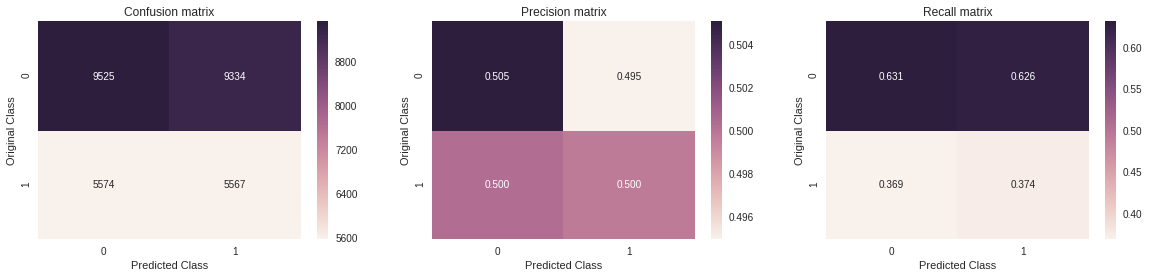

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import log_loss
predictedy=np.zeros((length,2))
for i in range(length):
    random1=np.random.rand(1,2)
    predictedy[i] = ((random1/sum(sum(random1)))[0])
    
predictedy =np.argmax(predictedy, axis=1)  
print(predictedy)
print(log_loss(y_test,predictedy,eps=1e-15))
plot_confusion_matrix(y_test, predictedy)

for given values fo alpha 1e-05 accuracy is 0.6286333333333334
For values of alpha =  1e-05 The log loss is: 0.659685127677702
for given values fo alpha 0.0001 accuracy is 0.6286333333333334
For values of alpha =  0.0001 The log loss is: 0.659685127677702
for given values fo alpha 0.001 accuracy is 0.6286333333333334
For values of alpha =  0.001 The log loss is: 0.659685127677702
for given values fo alpha 0.01 accuracy is 0.6286333333333334
For values of alpha =  0.01 The log loss is: 0.659685127677702
for given values fo alpha 0.1 accuracy is 0.6783333333333333
For values of alpha =  0.1 The log loss is: 0.6200860389786338
for given values fo alpha 1 accuracy is 0.6763666666666667
For values of alpha =  1 The log loss is: 0.619339294697677
for given values fo alpha 10 accuracy is 0.6821333333333334
For values of alpha =  10 The log loss is: 0.615711664935994


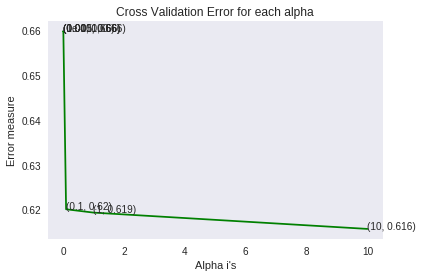

For values of best alpha =  10 The train log loss is: 0.6196838030910937
For values of best alpha =  10 The test log loss is: 0.615711664935994
Total number of data points : 30000


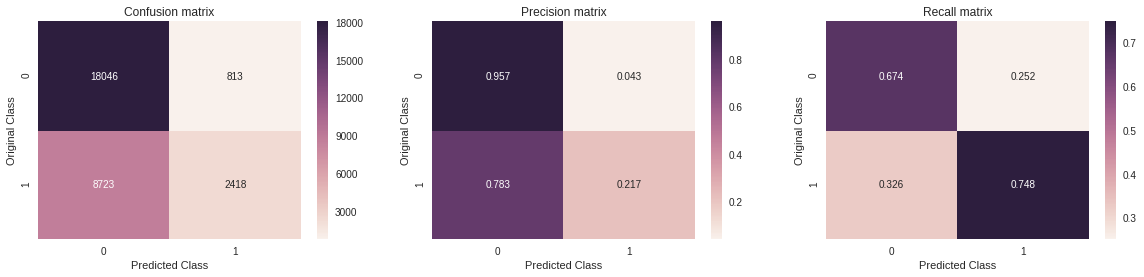

In [0]:
alpha = [10 ** x for x in range(-5, 2)] 
from sklearn.metrics import accuracy_score
log_error_array=[]
from sklearn.metrics import confusion_matrix
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    predicty1=sig_clf.predict(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('for given values fo alpha',i,'accuracy is',accuracy_score(y_test,predicty1))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

for given value of alpha 1e-05 log laoss iss 0.659685127677702
for given value of alpha 0.0001 log laoss iss 0.659685127677702
for given value of alpha 0.001 log laoss iss 0.659685127677702
for given value of alpha 0.01 log laoss iss 0.659685127677702
for given value of alpha 0.1 log laoss iss 0.6105906797575279
for given value of alpha 1 log laoss iss 0.6208995426098916
for given value of alpha 10 log laoss iss 0.659685127677702
for besat alpha value log loss is  0.6105906797575279


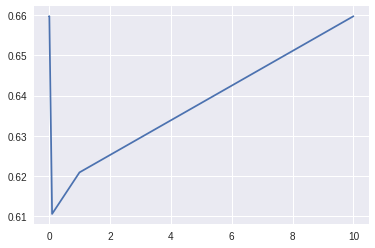

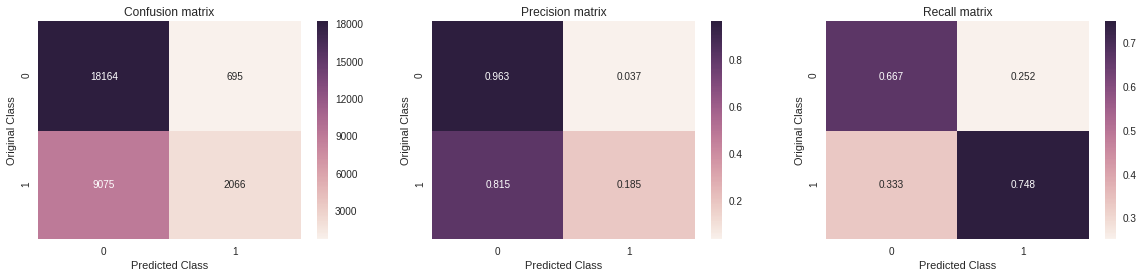

In [0]:
alpha=[10**x for x in range(-5,2)]
logerror=[]
for x in alpha:
    clf1=SGDClassifier(alpha=x,penalty='l1',loss='hinge',random_state=42)
    clf1.fit(X_train,y_train)
    sigmaclf1=CalibratedClassifierCV(clf1,method='sigmoid')
    sigmaclf1.fit(X_train,y_train)
    predictedy=sigmaclf1.predict_proba(X_test)
    print('for given value of alpha',x,'log laoss iss',log_loss(y_test,predictedy,eps=1e-15))
    logerror.append(log_loss(y_test,predictedy))
fig,ax=plt.subplots()
ax.plot(alpha,logerror)
bestalphaindex=np.argmin(logerror)
model=SGDClassifier(alpha=alpha[bestalphaindex],penalty='l1',loss='hinge',random_state=42)
model.fit(X_train,y_train)
sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
sigmamodel.fit(X_train,y_train)
predictedy1=sigmamodel.predict_proba(X_test)
print('for besat alpha value log loss is ',log_loss(y_test,predictedy1))
predictedz=sigmamodel.predict(X_test)
predictedy1=np.argmax(predictedy1,axis=1)
plot_confusion_matrix(y_test,predictedy1)

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=model.classes_, eps=1e-15))

[0]	train-logloss:0.685744	valid-logloss:0.685669
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.624842	valid-logloss:0.624272
[20]	train-logloss:0.580629	valid-logloss:0.579938
[30]	train-logloss:0.54712	valid-logloss:0.546381
[40]	train-logloss:0.521451	valid-logloss:0.520725
[50]	train-logloss:0.501553	valid-logloss:0.500962
[60]	train-logloss:0.485697	valid-logloss:0.485212
[70]	train-logloss:0.473115	valid-logloss:0.47275
[80]	train-logloss:0.462922	valid-logloss:0.462604
[90]	train-logloss:0.454256	valid-logloss:0.453906
[100]	train-logloss:0.447016	valid-logloss:0.446684
[110]	train-logloss:0.440965	valid-logloss:0.440657
[120]	train-logloss:0.435709	valid-logloss:0.43547
[130]	train-logloss:0.431494	valid-logloss:0.431412
[140]	train-logloss:0.42759	valid-logloss:0.427611
[150]	train-logloss:0.424325	valid-logloss:0.424451
[160]	train-logloss:0.421478	val

**assignment starts**
* perform logistic regression and svm on simple tfidf vectors
* we are using sgd classifier with log loss for logistic regression
* we are usong sgd classifiuer with hinge loss for svm

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
simpletfidf=TfidfVectorizer()
totalquestions=(list(data['question1']+data['question2']))
simpletfidfvectors=simpletfidf.fit_transform(totalquestions)


In [0]:
print(simpletfidfvectors.shape)

(100000, 46317)


In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(simpletfidfvectors,y,test_size=0.3)


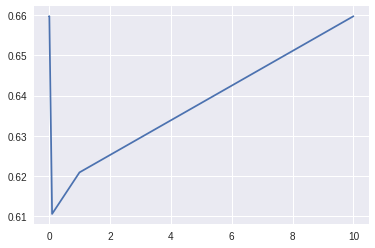

In [0]:
alpha=[10**x for x in range(-5,2)]
logerrorarray=[]
for i in alpha:
  model=SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
  model.fit(xtrain,ytrain)
  sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
  sigmamodel.fit(xtrain,ytrain)
  predicty=sigmamodel.predict_proba(xtest)
  logerrorarray.append(log_loss(ytest,predicty,labels=model.classes_,eps=1e-15))
fig,ax=plt.subplots()
ax.plot(alpha,logerror)
bestalphaindex=np.argmin(logerror)


for besat alpha value log loss is  0.6200860389786338


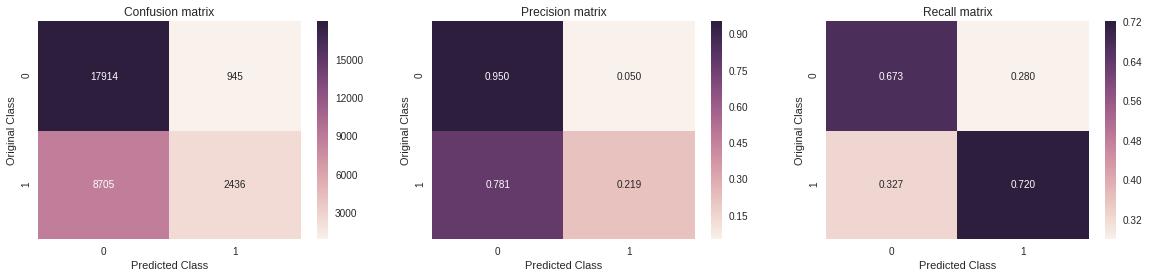

In [0]:
model=SGDClassifier(alpha=alpha[bestalphaindex],penalty='l2',loss='log',random_state=42)
model.fit(X_train,y_train)
sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
sigmamodel.fit(X_train,y_train)
predictedy1=sigmamodel.predict_proba(X_test)
print('for besat alpha value log loss is ',log_loss(y_test,predictedy1))
predictedz=sigmamodel.predict(X_test)
predictedy1=np.argmax(predictedy1,axis=1)
plot_confusion_matrix(y_test,predictedy1)

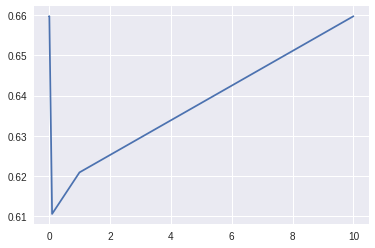

In [0]:
alpha=[10**x for x in range(-5,2)]
logerrorarray=[]
for i in alpha:
    model=SGDClassifier(alpha=i,penalty='l2',loss='hinge',random_state=42)
    model.fit(xtrain,ytrain)
    sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
    sigmamodel.fit(xtrain,ytrain)
    predicty=sigmamodel.predict_proba(xtest)
    logerrorarray.append(log_loss(ytest,predicty,labels=model.classes_,eps=1e-15))
fig,ax=plt.subplots()
ax.plot(alpha,logerror)
bestalphaindex=np.argmin(logerror)


for besat alpha value log loss is  0.6233548375170784


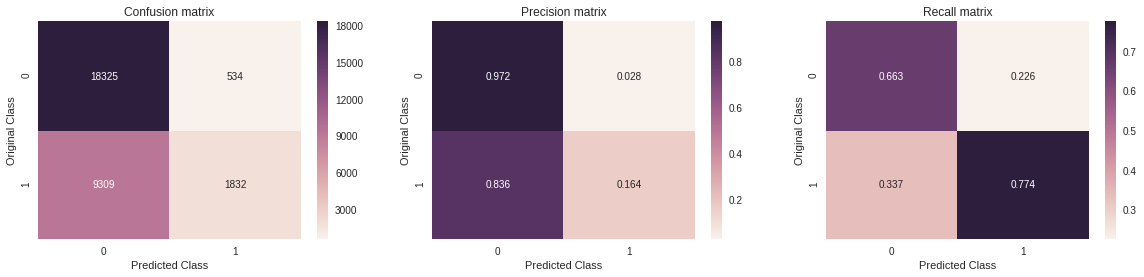

In [0]:
model=SGDClassifier(alpha=alpha[bestalphaindex],penalty='l2',loss='hinge',random_state=42)
model.fit(X_train,y_train)
sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
sigmamodel.fit(X_train,y_train)
predictedy1=sigmamodel.predict_proba(X_test)
print('for besat alpha value log loss is ',log_loss(y_test,predictedy1))
predictedz=sigmamodel.predict(X_test)
predictedy1=np.argmax(predictedy1,axis=1)
plot_confusion_matrix(y_test,predictedy1)

* hyperparamter xgboost uisng random search to reduce log loss

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

In [0]:
param_grid = {
        'silent': [False],
        'max_depth': [4],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}
fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]
              }

clf = xgb.XGBClassifier()

In [0]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=1, cv=2,
                            fit_params=fit_params,
                            scoring='neg_log_loss', )

In [0]:
rs_clf.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0]	validation_0-logloss:0.692787
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.692427
[2]	validation_0-logloss:0.692066
[3]	validation_0-logloss:0.691708
[4]	validation_0-logloss:0.691343
[5]	validation_0-logloss:0.690979
[6]	validation_0-logloss:0.69062
[7]	validation_0-logloss:0.690257
[8]	validation_0-logloss:0.689912
[9]	validation_0-logloss:0.689554
[10]	validation_0-logloss:0.689197
[11]	validation_0-logloss:0.688842
[12]	validation_0-logloss:0.68849
[13]	validation_0-logloss:0.688136
[14]	validation_0-logloss:0.6878
[15]	validation_0-logloss:0.687444
[16]	validation_0-logloss:0.68709
[17]	validation_0-logloss:0.686742
[18]	validation_0-logloss:0.686401
[19]	validation_0-logloss:0.686054
[20]	validation_0-logloss:0.685713
[21]	validation_0-logloss:0.685364
[22]	validation_0-logloss:0.685035
[23]	validation_0-logloss:0.684683
[24]	validation_0-logloss:0.684336
[25]	validation_0-logloss:0.684002
[26]	validation_0-logloss:0.683661
[2

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 30.8min finished


[0]	validation_0-logloss:0.625538
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.578223
[2]	validation_0-logloss:0.544754
[3]	validation_0-logloss:0.519971
[4]	validation_0-logloss:0.499425
[5]	validation_0-logloss:0.483294
[6]	validation_0-logloss:0.471036
[7]	validation_0-logloss:0.460966
[8]	validation_0-logloss:0.452502
[9]	validation_0-logloss:0.445963
[10]	validation_0-logloss:0.440607
[11]	validation_0-logloss:0.435279
[12]	validation_0-logloss:0.431142
[13]	validation_0-logloss:0.427838
[14]	validation_0-logloss:0.424226
[15]	validation_0-logloss:0.42184
[16]	validation_0-logloss:0.418243
[17]	validation_0-logloss:0.416214
[18]	validation_0-logloss:0.414581
[19]	validation_0-logloss:0.412998
[20]	validation_0-logloss:0.411325
[21]	validation_0-logloss:0.409956
[22]	validation_0-logloss:0.408504
[23]	validation_0-logloss:0.406775
[24]	validation_0-logloss:0.405918
[25]	validation_0-logloss:0.404829
[26]	validation_0-logloss:0.40335

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params={'eval_metric': 'logloss', 'early_stopping_rounds': 10, 'eval_set': [(          id    qid1    qid2  qid1freq  qid2freq  q1len  q2len  q1words  \
32202  32202   59308   17114         1         2     38     36        6
47716  47716   85165    5715         5         5     35     43       ...    0
13599    0
8581     1
63982    1
80287    1
Name: is_duplicate, Length: 70000, dtype: int64)]},
          iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'silent': [False], 'max_depth': [4], 'learning_

In [0]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_

In [0]:
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.37901599361268007
Best params: 
colsample_bylevel: 0.6
colsample_bytree: 1.0
gamma: 0.25
learning_rate: 0.2
max_depth: 4
min_child_weight: 0.5
n_estimators: 100
reg_lambda: 1.0
silent: False
subsample: 0.8


In [0]:
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.2,objective='binary:logistic',min_child_weight=0.5,
                        subsample=0.5,colsample_bytree = 0.6,colsample_bylevel = 0.6,gamma=1.0)
                        
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_test)
log_loss(y_test, predict_y, eps=1e-15)
print("The log loss is:",log_loss(y_test, predict_y,  eps=1e-15))

The log loss is: 0.3816437762487748


***documentation and conclusions***

In [5]:
s=[[10,0.615],[0.0001,0.610]]
import pandas as pd
s1=pd.DataFrame(s,columns=['bestparameteralpha','testlogloss'],index=['sgd with logloss(logistic regression)','sgd with hinge loss(svm)'])
s1

,bestparameteralpha,testlogloss
sgd with logloss(logistic regression),10.0000,0.615
sgd with hinge loss(svm),0.0001,0.610


In [6]:
s=[[10,0.62],[0.0001,0.62]]
import pandas as pd
s1=pd.DataFrame(s,columns=['bestparameteralpha','testlogloss'],index=['sgd with logloss(logistic regression)','sgd with hinge loss(svm)'])
s1

,bestparameteralpha,testlogloss
sgd with logloss(logistic regression),10.0000,0.62
sgd with hinge loss(svm),0.0001,0.62
